In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import itertools

sns.set(style="dark")
plt.style.use("ggplot")
%matplotlib inline

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [3]:
# Long Short-Term Memory (LSTM) networks implemented using deep learning frameworks like TensorFlow
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [30]:
data = pd.read_csv('FEmerged_20182022 copy.csv')
data['highest_restriction'] = data['highest_restriction'].fillna('None')
data.drop(columns=['Plastic Growth Rate'], inplace=True)
# bambi dont accept column names that have spaces so change column names
data.rename(columns={'Plastic per day (ton)': 'Plastic_per_day_tons'}, inplace=True)
data.rename(columns={'Plastic per year (ton)': 'Plastic_per_year_tons'}, inplace=True)
data.rename(columns={'Land Area (km2)': 'Land_Area_km2'}, inplace=True)
data.rename(columns={'Years Since Start': 'Years_Since_Start'}, inplace=True)
data.dropna(inplace=True)

data

,Year,Province,Regency/City,Plastic_per_day_tons,Plastic_per_year_tons,Land_Area_km2,Population,GDP,Gini,HDI,highest_restriction,start_date,Years_Since_Start,log_GDP,log_Gini,squareroot_landarea
0,2019,Aceh,ACEH SELATAN,17.468853,6375.918288,4175.38,238081.0,5.479426e+06,0.273,66.90,None,2019,0,6.738735,-0.563837,64.617180
1,2019,Aceh,ACEH TENGAH,25.242500,9213.435000,4468.42,212494.0,7.472446e+06,0.256,73.14,None,2019,0,6.873463,-0.591760,66.846241
2,2019,Aceh,SIMEULUE,15.495900,5655.559350,1821.75,93228.0,2.211886e+06,0.340,65.70,None,2019,0,6.344763,-0.468521,42.681963
3,2019,Aceh,GAYO LUES,6.398800,2335.562000,5541.29,94100.0,2.608734e+06,0.290,66.87,None,2019,0,6.416430,-0.537602,74.439841
4,2019,Aceh,BENER MERIAH,11.816469,4312.692510,1907.40,148175.0,4.423115e+06,0.267,72.97,None,2019,0,6.645728,-0.573489,43.673791
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1029,2022,Sumatera Utara,HUMBANG HASUNDUTAN,7.712900,2814.984900,2351.51,202299.0,6.919485e+06,0.258,70.32,Fee,2020,2,6.840074,-0.588380,48.492371
1030,2022,Sumatera Utara,KOTA MEDAN,243.683302,88944.436534,279.29,2494512.0,2.801590e+08,0.399,81.76,Ban,2019,3,8.447405,-0.399027,16.711972
1031,2022,Sumatera Utara,KOTA PEMATANG SIANTAR,24.143000,8812.144000,75.92,274056.0,1.520831e+07,0.321,79.70,Fee,2020,2,7.182081,-0.493495,8.713208
1032,2022,Sumatera Utara,KOTA TEBING TINGGI,20.750895,7573.785300,39.17,177785.0,6.931267e+06,0.334,76.17,Ban,2018,4,6.840813,-0.476254,6.258594


In [31]:
# Identify cities with bans
cities_with_bans = data[data['highest_restriction'] == 'Ban']['Regency/City'].unique()
print(cities_with_bans)
ban_data = data[data['Regency/City'].isin(cities_with_bans)]
ban_data

['KOTA BANDA ACEH' 'JEMBRANA' 'BADUNG' 'GIANYAR' 'BANGLI' 'KARANGASEM'
 'BULELENG' 'KOTA DENPASAR' 'TABANAN' 'KLUNGKUNG' 'KOTA TANGERANG' 'LEBAK'
 'KULON PROGO' 'BANTUL' 'GUNUNGKIDUL' 'SLEMAN' 'KOTA YOGYAKARTA'
 'ADM. KEP. SERIBU' 'KOTA ADM. JAKARTA PUSAT' 'KOTA ADM. JAKARTA UTARA'
 'KOTA ADM. JAKARTA BARAT' 'KOTA ADM. JAKARTA SELATAN'
 'KOTA ADM. JAKARTA TIMUR' 'KOTA JAMBI' 'SUKABUMI' 'CIAMIS' 'BEKASI'
 'KOTA BOGOR' 'KOTA SUKABUMI' 'KOTA DEPOK' 'KOTA CIMAHI' 'KOTA BANDUNG'
 'INDRAMAYU' 'KOTA BEKASI' 'WONOGIRI' 'PATI' 'KUDUS' 'KOTA SEMARANG'
 'BANYUMAS' 'KOTA SALATIGA' 'TULUNGAGUNG' 'BLITAR' 'LUMAJANG' 'SITUBONDO'
 'GRESIK' 'PAMEKASAN' 'KOTA KEDIRI' 'KOTA MALANG' 'KOTA PROBOLINGGO'
 'KOTA SURABAYA' 'KOTA BATU' 'JOMBANG' 'KOTA PONTIANAK' 'TANAH LAUT'
 'BARITO KUALA' 'TAPIN' 'HULU SUNGAI UTARA' 'TANAH BUMBU'
 'KOTA BANJARMASIN' 'KOTA BANJARBARU' 'TABALONG' 'BANJAR' 'BERAU'
 'KOTA BALIKPAPAN' 'KOTA SAMARINDA' 'KOTA BONTANG' 'NUNUKAN'
 'KOTA TARAKAN' 'KOTA TANJUNG PINANG' 'KOTA AMBON' 'BIA

,Year,Province,Regency/City,Plastic_per_day_tons,Plastic_per_year_tons,Land_Area_km2,Population,GDP,Gini,HDI,highest_restriction,start_date,Years_Since_Start,log_GDP,log_Gini,squareroot_landarea
5,2019,Aceh,KOTA BANDA ACEH,16.224800,5922.049280,56.77,270321.0,1.856908e+07,0.289,85.07,Fee,2020,-1,7.268790,-0.539102,7.534587
13,2020,Aceh,KOTA BANDA ACEH,16.543720,6038.408160,56.77,252899.0,1.850163e+07,0.303,85.41,Ban,2020,0,7.267210,-0.518557,7.534587
17,2021,Aceh,KOTA BANDA ACEH,41.279220,15067.132760,56.77,255029.0,1.994340e+07,0.347,85.71,Ban,2020,1,7.299799,-0.459671,7.534587
35,2022,Aceh,KOTA BANDA ACEH,12.106080,4418.682240,56.77,257635.0,2.155695e+07,0.391,86.28,Ban,2020,2,7.333587,-0.407823,7.534587
39,2019,Bali,JEMBRANA,36.182120,13206.394240,849.13,278100.0,1.413670e+07,0.290,72.35,Ban,2019,0,7.150348,-0.537602,29.139835
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1010,2020,Sumatera Utara,KOTA TEBING TINGGI,20.402910,7446.885660,39.17,166100.0,6.049163e+06,0.334,75.17,Ban,2018,2,6.781695,-0.476254,6.258594
1019,2021,Sumatera Utara,KOTA MEDAN,265.074000,96751.884000,279.29,2460858.0,2.547213e+08,0.402,81.21,Ban,2019,2,8.406065,-0.395774,16.711972
1021,2021,Sumatera Utara,KOTA TEBING TINGGI,20.562750,7505.422065,39.17,174969.0,6.349945e+06,0.344,75.42,Ban,2018,3,6.802770,-0.463442,6.258594
1030,2022,Sumatera Utara,KOTA MEDAN,243.683302,88944.436534,279.29,2494512.0,2.801590e+08,0.399,81.76,Ban,2019,3,8.447405,-0.399027,16.711972


In [48]:
# normalize data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
ban_data['scaled_plastic'] = scaler.fit_transform(ban_data['Plastic_per_year_tons'].values.reshape(-1,1))
ban_data

<ipython-input-48-dce0eb54e7a6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ban_data['scaled_plastic'] = scaler.fit_transform(ban_data['Plastic_per_year_tons'].values.reshape(-1,1))


,Year,Province,Regency/City,Plastic_per_day_tons,Plastic_per_year_tons,Land_Area_km2,Population,GDP,Gini,HDI,highest_restriction,start_date,Years_Since_Start,log_GDP,log_Gini,squareroot_landarea,scaled_plastic
5,2019,Aceh,KOTA BANDA ACEH,16.224800,5922.049280,56.77,270321.0,1.856908e+07,0.289,85.07,Fee,2020,-1,7.268790,-0.539102,7.534587,0.036240
13,2020,Aceh,KOTA BANDA ACEH,16.543720,6038.408160,56.77,252899.0,1.850163e+07,0.303,85.41,Ban,2020,0,7.267210,-0.518557,7.534587,0.036958
17,2021,Aceh,KOTA BANDA ACEH,41.279220,15067.132760,56.77,255029.0,1.994340e+07,0.347,85.71,Ban,2020,1,7.299799,-0.459671,7.534587,0.092735
35,2022,Aceh,KOTA BANDA ACEH,12.106080,4418.682240,56.77,257635.0,2.155695e+07,0.391,86.28,Ban,2020,2,7.333587,-0.407823,7.534587,0.026952
39,2019,Bali,JEMBRANA,36.182120,13206.394240,849.13,278100.0,1.413670e+07,0.290,72.35,Ban,2019,0,7.150348,-0.537602,29.139835,0.081240
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1010,2020,Sumatera Utara,KOTA TEBING TINGGI,20.402910,7446.885660,39.17,166100.0,6.049163e+06,0.334,75.17,Ban,2018,2,6.781695,-0.476254,6.258594,0.045660
1019,2021,Sumatera Utara,KOTA MEDAN,265.074000,96751.884000,279.29,2460858.0,2.547213e+08,0.402,81.21,Ban,2019,2,8.406065,-0.395774,16.711972,0.597362
1021,2021,Sumatera Utara,KOTA TEBING TINGGI,20.562750,7505.422065,39.17,174969.0,6.349945e+06,0.344,75.42,Ban,2018,3,6.802770,-0.463442,6.258594,0.046021
1030,2022,Sumatera Utara,KOTA MEDAN,243.683302,88944.436534,279.29,2494512.0,2.801590e+08,0.399,81.76,Ban,2019,3,8.447405,-0.399027,16.711972,0.549130


In [49]:
# Data Preprocessing
X = ban_data[['Population', 'log_GDP', 'log_Gini', 'squareroot_landarea', 'HDI', 'Years_Since_Start']]
y = ban_data['scaled_plastic']

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

# Reshape input to be 3D [samples, timesteps, features]
X_train_reshaped = np.reshape(X_train_scaled, (X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_reshaped = np.reshape(X_test_scaled, (X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))


In [50]:
# LSTM Model
model = Sequential()
model.add(LSTM(units=50, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mse')

In [54]:
## Train the model
# model.fit(X_train_reshaped, y_train, epochs=50, batch_size=32, validation_data=(X_test_reshaped, y_test))

# Initialize model
model = Sequential()

# LSTM layer 1
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train_reshaped.shape[1], X_train_reshaped.shape[2])))
model.add(Dropout(0.25)) ## need to tune this, just use 0.25 fo rnow

# LSTM layer 2
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.25))

# LSTM layer 3
model.add(LSTM(units = 50))
model.add(Dropout(0.25))

# final layer
model.add(Dense(units = 1, activation ='linear'))
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_14 (LSTM)              (None, 1, 50)             11400     
                                                                 
 dropout_9 (Dropout)         (None, 1, 50)             0         
                                                                 
 lstm_15 (LSTM)              (None, 1, 50)             20200     
                                                                 
 dropout_10 (Dropout)        (None, 1, 50)             0         
                                                                 
 lstm_16 (LSTM)              (None, 50)                20200     
                                                                 
 dropout_11 (Dropout)        (None, 50)                0         
                                                                 
 dense_6 (Dense)             (None, 1)                

In [56]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
model.fit(X_train_reshaped, y_train, epochs = 50, batch_size=32)
# Evaluate the model
loss = model.evaluate(X_test_reshaped, y_test)
print('Test Loss:', loss)

Epoch 1/50
9/9 [==============================] - 8s 7ms/step - loss: 0.0640 - accuracy: 0.0000e+00
Epoch 2/50
9/9 [==============================] - 0s 7ms/step - loss: 0.0512 - accuracy: 0.0000e+00
Epoch 3/50
9/9 [==============================] - 0s 7ms/step - loss: 0.0376 - accuracy: 0.0000e+00
Epoch 4/50
9/9 [==============================] - 0s 8ms/step - loss: 0.0250 - accuracy: 0.0000e+00
Epoch 5/50
9/9 [==============================] - 0s 7ms/step - loss: 0.0194 - accuracy: 0.0000e+00
Epoch 6/50
9/9 [==============================] - 0s 8ms/step - loss: 0.0205 - accuracy: 0.0000e+00
Epoch 7/50
9/9 [==============================] - 0s 6ms/step - loss: 0.0176 - accuracy: 0.0000e+00
Epoch 8/50
9/9 [==============================] - 0s 8ms/step - loss: 0.0160 - accuracy: 0.0000e+00
Epoch 9/50
9/9 [==============================] - 0s 6ms/step - loss: 0.0143 - accuracy: 0.0000e+00
Epoch 10/50
9/9 [==============================] - 0s 8ms/step - loss: 0.0187 - accuracy: 0.0000e+00

In [57]:
# Make predictions
predictions = model.predict(X_test_reshaped)

predicted_plastic = scaler.inverse_transform(predictions)
predicted_plastic[:5]

# also transform the ytrain and ytest to normal scale
train_plastic = scaler.inverse_transform(y_train.values.reshape(-1, 1))
test_plastic = scaler.inverse_transform(y_test.values.reshape(-1, 1))

3/3 [==============================] - 17s 5ms/step


In [67]:
def trend_predvsactual(test_features, actual, pred, model_name, scaler):
    import pandas as pd
    import matplotlib.pyplot as plt

    # Inverse scaling for actual and predicted values
    actual_inverse_scaled = scaler.inverse_transform(actual.reshape(-1, 1)).flatten()
    pred_inverse_scaled = scaler.inverse_transform(pred.reshape(-1, 1)).flatten()

    # Convert actual and predicted values to pandas DataFrames
    actual_df = pd.DataFrame({'Years_Since_Start': test_features[:, 0, -1], 'Actual_Plastic_Per_Year': actual_inverse_scaled})
    pred_df = pd.DataFrame({'Years_Since_Start': test_features[:, 0, -1], 'Predicted_Plastic_Per_Year': pred_inverse_scaled})

    # Calculate average and standard deviation of actual and predicted plastic per year
    avg_actual_plastic = actual_df.groupby('Years_Since_Start')['Actual_Plastic_Per_Year'].mean()
    std_dev_actual_plastic = actual_df.groupby('Years_Since_Start')['Actual_Plastic_Per_Year'].std()

    avg_predicted_plastic = pred_df.groupby('Years_Since_Start')['Predicted_Plastic_Per_Year'].mean()
    std_dev_predicted_plastic = pred_df.groupby('Years_Since_Start')['Predicted_Plastic_Per_Year'].std()

    # Plot the actual values
    plt.plot(avg_actual_plastic.index, avg_actual_plastic, label='Actual Plastic per year (ton)', color='blue')

    # Plot the predicted values
    plt.plot(avg_predicted_plastic.index, avg_predicted_plastic, label='Predicted Plastic per year (ton)', color='red')

    # Plot the shaded intervals representing variability for actual values
    plt.fill_between(avg_actual_plastic.index, avg_actual_plastic - std_dev_actual_plastic, avg_actual_plastic + std_dev_actual_plastic, color='blue', alpha=0.3)

    # Plot the shaded intervals representing variability for predicted values
    plt.fill_between(avg_predicted_plastic.index, avg_predicted_plastic - std_dev_predicted_plastic, avg_predicted_plastic + std_dev_predicted_plastic, color='red', alpha=0.3)

    # Add labels and title
    plt.xlabel('Years since start of ban')
    plt.ylabel('Plastic per year (ton)')
    plt.title('Actual vs Predicted Plastic Pollution Trends - ' + model_name)
    plt.legend()

    # Show the plot
    plt.show()


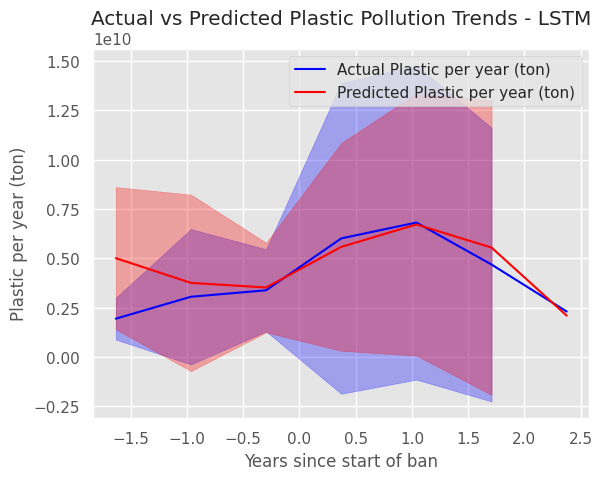

In [69]:
trend_predvsactual(X_test_reshaped, test_plastic, predicted_plastic, 'LSTM', scaler)

In [70]:
model.save('LSTM.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [72]:
from google.colab import files
files.download('LSTM.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [75]:
# Save unscaled predictions to a file
np.savetxt("unscaled_predictions.csv", predictions, delimiter=",")

# Save unscaled y_test to a file
np.savetxt("unscaled_y_test.csv", y_test, delimiter=",")

# Save X_test_reshaped to a file
np.save("X_test_reshaped.npy", X_test_reshaped)

# Save the scaler object to a file using joblib
import joblib
joblib.dump(scaler, "scaler.pkl")


['scaler.pkl']

In [76]:
from google.colab import files
files.download("unscaled_predictions.csv")
files.download("unscaled_y_test.csv")
files.download("X_test_reshaped.npy")
files.download("scaler.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>